In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../")

from utils_added import EvalData

## Extracting Data

Notes:
- model(Nov27_23-37-47_spark-agent) 
    - trained on shapenet full point cloud dataset (c3po), of all objects.
    - learning_rate=1e-4, decay=1e-4. 
- model(Nov28_05-53-37_spark-agent)
    - trained on shapenet depth point cloud dataset (c3po), of all objects.
    - learning_rate=1e-4, decay=1e-4.

Ref: 
- [Planning Document](https://docs.google.com/spreadsheets/d/1h3Efvla1wdXcchA3LMzhxp4oVBqwlv0Hi6VNHc8rJOc/edit#gid=0) 

In [24]:
labels = [#"lk-shd (shapenet all)", 
          "lk-shd (shapenet depth all)",
          #"lk-md (shapenet all)", 
          "lk-md (shapenet depth all)"]

files = []
# model (Nov27_23-37-47_spark-agent) evaluated on: shapenet all
# files.append("../runs/Nov28_08-56-27_spark-agent/eval_data.pkl")

# model (Nov27_23-37-47_spark-agent) evaluated on: shapenet depth all
# files.append("../runs/Nov28_08-58-58_spark-agent/eval_data.pkl")


# model (Nov28_05-53-37_spark-agent) evaluated on: shapenet all
# files.append("../runs/Nov28_09-00-40_spark-agent/eval_data.pkl")

# model (Nov28_05-53-37_spark-agent) evaluated on: shapenet depth all
files.append("../runs/Nov28_09-02-15_spark-agent/eval_data.pkl")


# model (pre-trained) evaluated on: shapenet all
# files.append("../runs/Nov27_12-46-54_spark-agent/eval_data.pkl")

# model (pre-trained) evaluated on: shapenet depth all
files.append("../runs/Nov27_16-10-46_spark-agent/eval_data.pkl")


In [25]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData()
    eval_data.init()
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

label:  lk-shd (shapenet depth all)
loading file:  ../runs/Nov28_09-02-15_spark-agent/eval_data.pkl
label:  lk-md (shapenet depth all)
loading file:  ../runs/Nov27_16-10-46_spark-agent/eval_data.pkl


## ADD-S and ADD-S (AUC)

In [26]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,lk-shd (shapenet depth all),lk-md (shapenet depth all)
adds_th_score,0.167969,0.097656
adds_auc,0.158642,0.115548


Highlights
- shapenet-depth trained model (lk-shd) does better than modelnet trained model (lk-md), on shapenet depth all dataset

## Distribution of Error Metrics

In [27]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [28]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

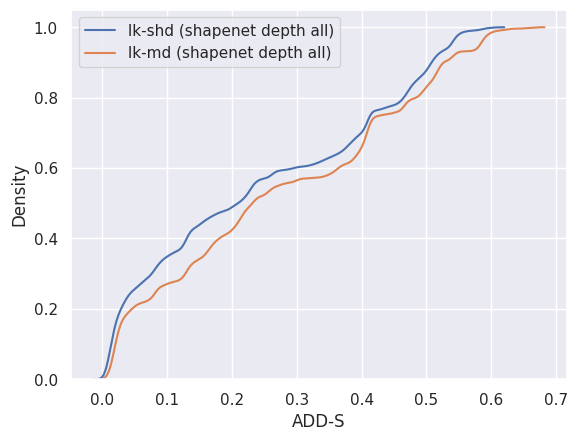

In [29]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [30]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [31]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

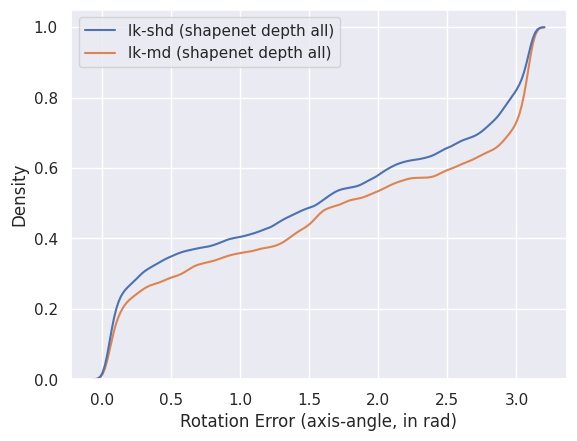

In [32]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [33]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [34]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

Text(0.5, 0, 'Translation Error')

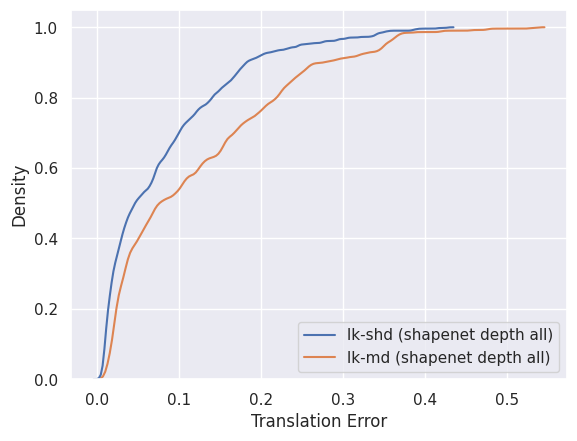

In [35]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')

## Evaluating on Easy Dataset

In [37]:
labels = [#"lk-shd (shapenet all)", 
          "lk-shd (shapenet-easy depth all)",
          #"lk-md (shapenet all)", 
          "lk-md (shapenet-easy depth all)"]

files = []
# model (Nov28_05-53-37_spark-agent) evaluated on: shapenet-easy depth all
files.append("../runs/Nov28_09-30-40_spark-agent/eval_data.pkl")
 

# model (pre-trained) evaluated on: shapenet-easy depth all
files.append("../runs/Nov27_18-38-31_spark-agent/eval_data.pkl")


In [38]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData()
    eval_data.init()
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

label:  lk-shd (shapenet-easy depth all)
loading file:  ../runs/Nov28_09-30-40_spark-agent/eval_data.pkl
label:  lk-md (shapenet-easy depth all)
loading file:  ../runs/Nov27_18-38-31_spark-agent/eval_data.pkl


In [42]:
## ADD-S and ADD-S (AUC)

In [43]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,lk-shd (shapenet-easy depth all),lk-md (shapenet-easy depth all)
adds_th_score,0.589844,0.343750
adds_auc,0.562770,0.345262


In [44]:
## Distribution of Error Metrics

In [45]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [46]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

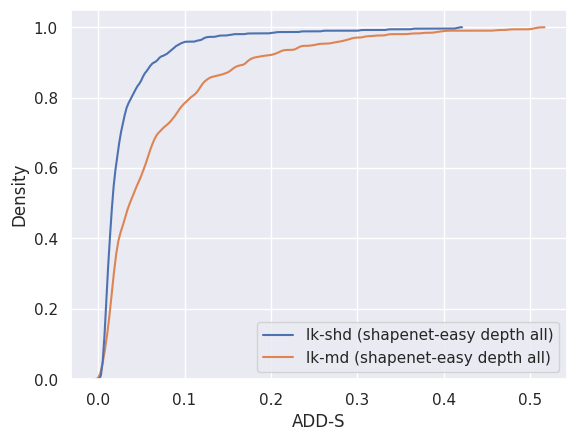

In [47]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

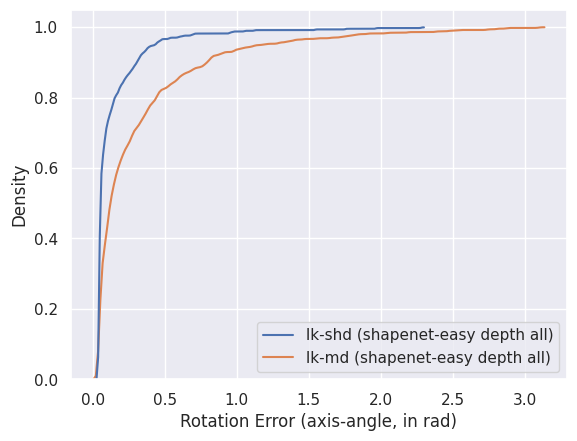

In [48]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_

conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

Text(0.5, 0, 'Translation Error')

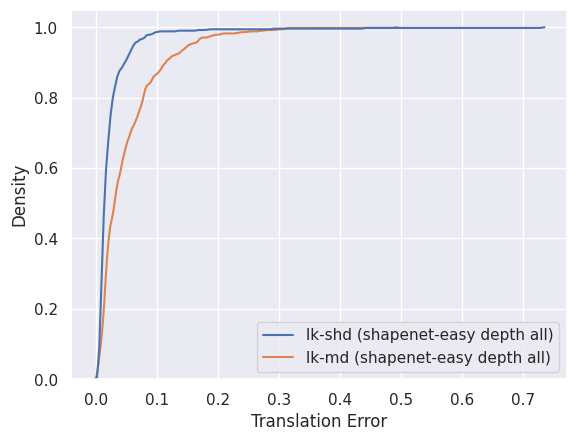

In [49]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_

conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')